# Titanic Dataset Analysis

## Importing Data Set from Caggle

In [1]:
Data <- read.csv('/Users/abhijith/Desktop/Machine LearningwithR/titanic_train.csv')

## Checking the Data

In [2]:
head(Data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,,Q


# Understanding the Data

In [3]:
summary(Data)

  PassengerId       Survived          Pclass     
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000  
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000  
 Median :446.0   Median :0.0000   Median :3.000  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309  
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000  
 Max.   :891.0   Max.   :1.0000   Max.   :3.000  
                                                 
                                    Name         Sex           Age       
 Abbing, Mr. Anthony                  :  1   female:314   Min.   : 0.42  
 Abbott, Mr. Rossmore Edward          :  1   male  :577   1st Qu.:20.12  
 Abbott, Mrs. Stanton (Rosa Hunt)     :  1                Median :28.00  
 Abelson, Mr. Samuel                  :  1                Mean   :29.70  
 Abelson, Mrs. Samuel (Hannah Wizosky):  1                3rd Qu.:38.00  
 Adahl, Mr. Mauritz Nils Martin       :  1                Max.   :80.00  
 (Other)                              :885                NA's   :177    
     Sib

In [6]:
library(ggplot2)

### Plotting a Bar plot for Survived variable

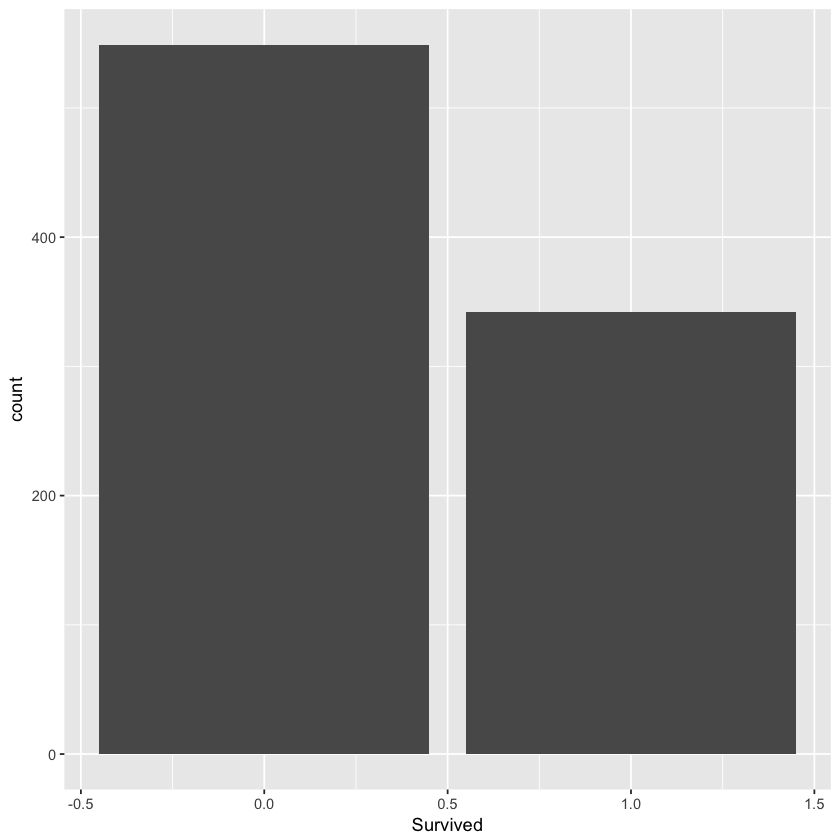

In [8]:
ggplot(Data,aes(Survived)) + geom_bar()

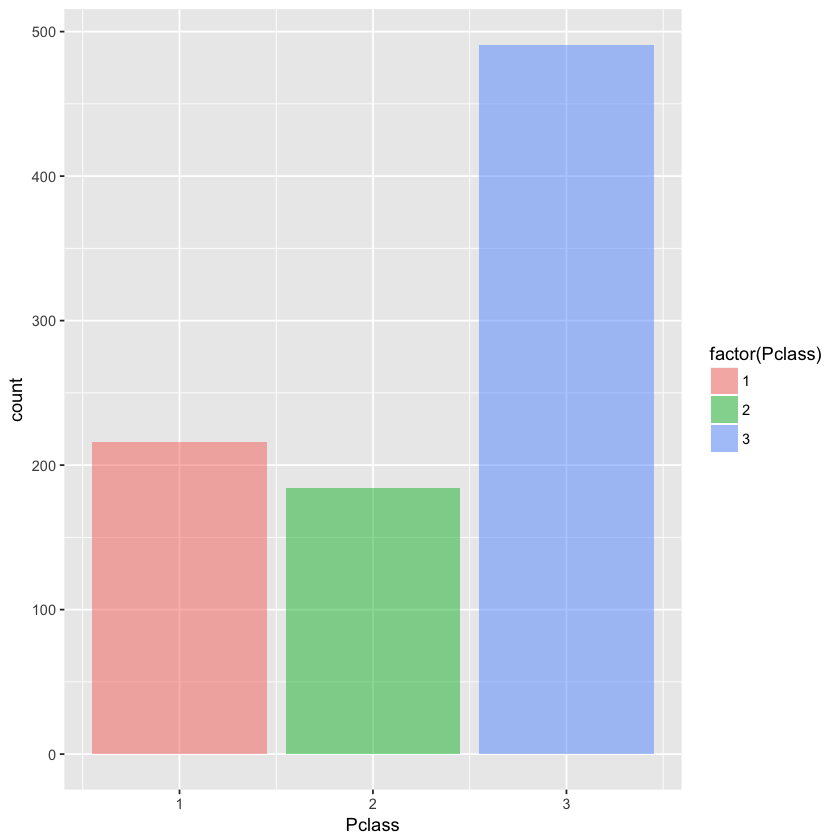

In [9]:
ggplot(Data,aes(Pclass)) + geom_bar(aes(fill=factor(Pclass)),alpha=0.5)

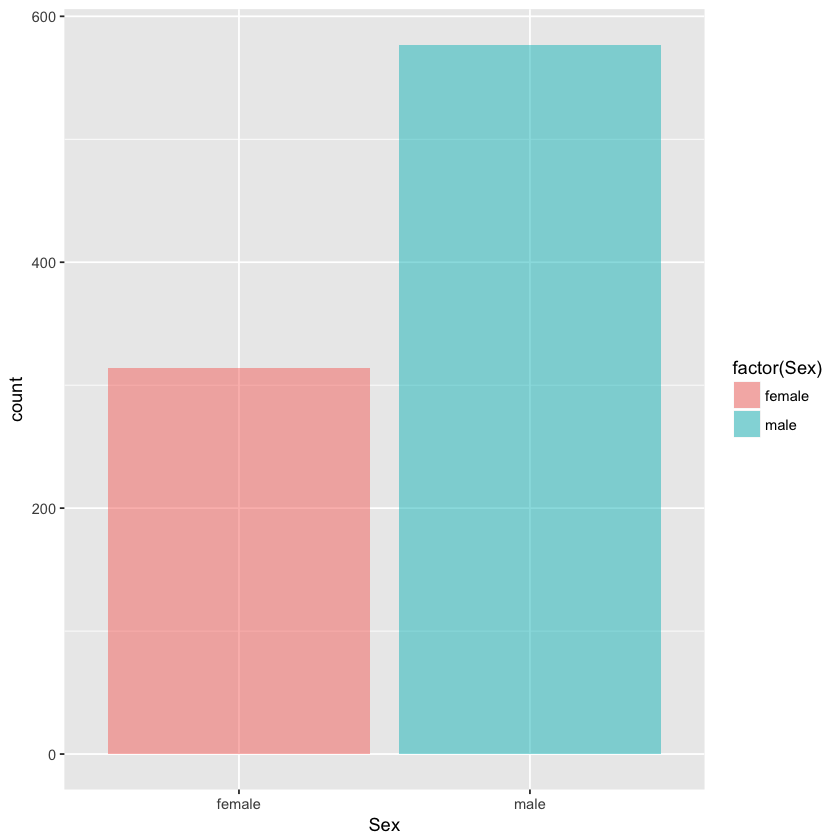

In [11]:
ggplot(Data,aes(Sex)) + geom_bar(aes(fill=factor(Sex)),alpha=0.5)

Warning message:
“Removed 177 rows containing non-finite values (stat_bin).”

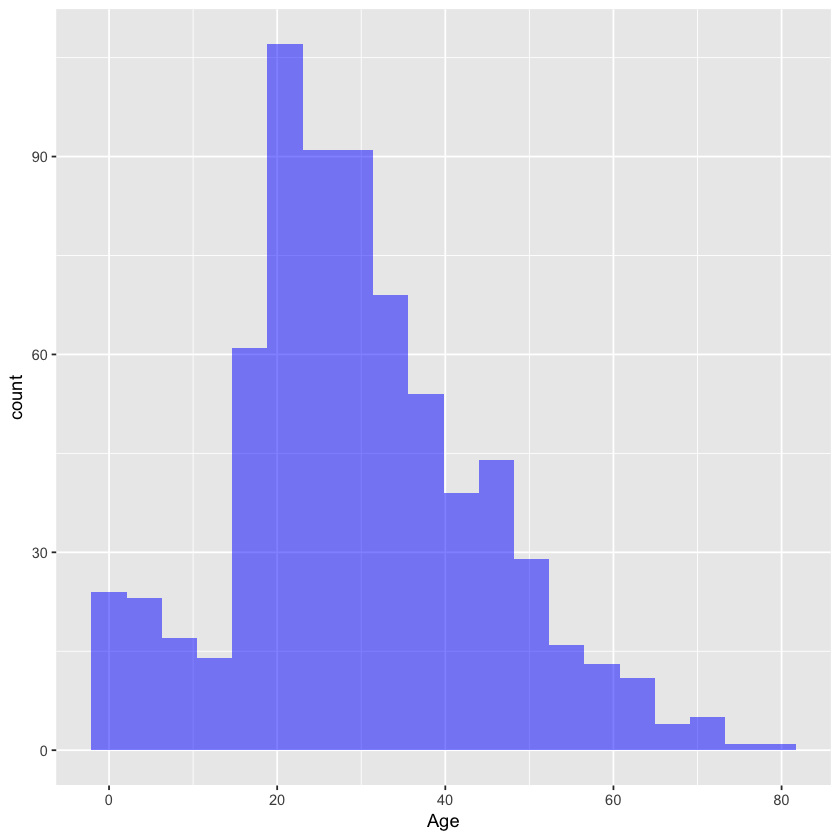

In [12]:
ggplot(Data,aes(Age)) + geom_histogram(fill='blue',bins=20,alpha=0.5)


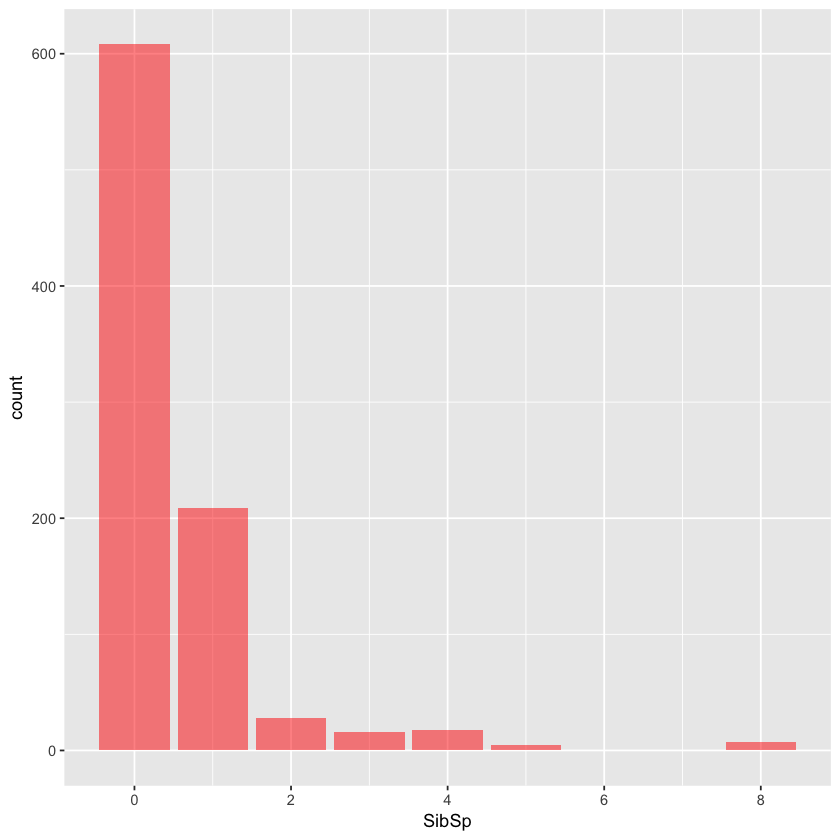

In [13]:
ggplot(Data,aes(SibSp)) + geom_bar(fill='red',alpha=0.5)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


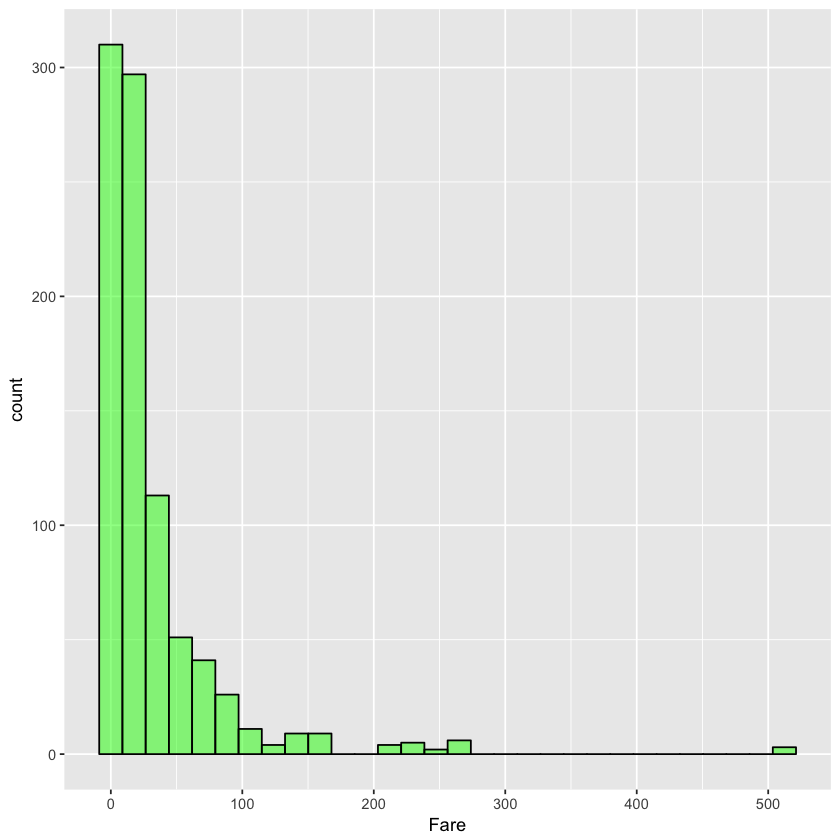

In [14]:
ggplot(Data,aes(Fare)) + geom_histogram(fill='green',color='black',alpha=0.5)

# Missing Values Handling

In [15]:
impute_age <- function(age,class){
  out <- age
  for (i in 1:length(age)){
    
    if (is.na(age[i])){
      
      if (class[i] == 1){
        out[i] <- 37
        
      }else if (class[i] == 2){
        out[i] <- 29
        
      }else{
        out[i] <- 24
      }
    }else{
      out[i]<-age[i]
    }
  }
  return(out)
}

### Handling charecter variables by converting to factor varibles

In [17]:
fixed.ages <- impute_age(Data$Age,Data$Pclass)
Data$Age <- fixed.ages
library(dplyr)
Data <- select(Data,-PassengerId,-Name,-Ticket,-Cabin)
Data$Survived <- factor(Data$Survived)
Data$Pclass <- factor(Data$Pclass)
Data$Parch <- factor(Data$Parch)
Data$SibSp <- factor(Data$SibSp)

### Data Set is Ready So Next is to Split into Test & Train

In [19]:
library(caTools)
set.seed(101)

split = sample.split(Data$Survived, SplitRatio = 0.70)

train = subset(Data, split == TRUE)
test = subset(Data, split == FALSE)

In [20]:
summary(train)

 Survived Pclass      Sex           Age        SibSp   Parch  
 0:384    1:147   female:219   Min.   : 0.42   0:427   0:468  
 1:239    2:124   male  :404   1st Qu.:22.00   1:144   1: 85  
          3:352                Median :26.00   2: 21   2: 60  
                               Mean   :29.00   3: 11   3:  4  
                               3rd Qu.:37.00   4: 11   4:  2  
                               Max.   :80.00   5:  5   5:  3  
                                               8:  4   6:  1  
      Fare         Embarked
 Min.   :  0.000    :  1   
 1st Qu.:  7.896   C:119   
 Median : 14.454   Q: 56   
 Mean   : 32.121   S:447   
 3rd Qu.: 30.500           
 Max.   :512.329           
                           

In [21]:
summary(test)

 Survived Pclass      Sex           Age        SibSp   Parch  
 0:165    1: 69   female: 95   Min.   : 0.67   0:181   0:210  
 1:103    2: 60   male  :173   1st Qu.:22.00   1: 65   1: 33  
          3:139                Median :26.50   2:  7   2: 20  
                               Mean   :29.23   3:  5   3:  1  
                               3rd Qu.:36.62   4:  7   4:  2  
                               Max.   :70.00   5:  0   5:  2  
                                               8:  3   6:  0  
      Fare         Embarked
 Min.   :  0.000    :  1   
 1st Qu.:  7.925   C: 49   
 Median : 14.454   Q: 21   
 Mean   : 32.398   S:197   
 3rd Qu.: 34.109           
 Max.   :512.329           
                           

### Building a classifier (logit)

In [28]:
model <- glm(formula=Survived ~ . , family = binomial(link='logit'),data = train)
summary(model)


Call:
glm(formula = Survived ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3       7.919e-01  1.229e+00

### Understanding the Variables

As we see the model finds the most mportant variables as Pclass,Sex,Age,Siblings but interestingly fare is not an important variables, 
as the model identifies fare doest plays a role in explaining the variance in survival status of the passinger

### Predicting on Test Data Set

In [29]:
pred <- predict(model,newdata=test,type='response')

In [35]:
library(caret)
table(test$Survived,pred>0.5)

   
    FALSE TRUE
  0   140   25
  1    29   74

Accuracy:80%

## Implementing the Model with Cross Validation to identify if the model is overfit/Underfit

In [37]:
library(caret)
model <- train(Survived ~ .,train,
               method = "glm",
               trControl = trainControl(
                 method = "cv", number = 10,
                 verboseIter = TRUE
               )
)
summary(model)
fitted.probabilities1 <- predict(model,newdata=test[-1])
table(fitted.probabilities1,final.test$Survived)
confusionMatrix(fitted.probabilities1,final.test$Survived)

+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

- Fold04: parameter=none 
+ Fold05: parameter=none 


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set



Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8288  -0.5607  -0.4096   0.6174   2.4898  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.777e+01  2.400e+03   0.007 0.994091    
Pclass2     -1.230e+00  3.814e-01  -3.225 0.001261 ** 
Pclass3     -2.160e+00  3.841e-01  -5.624 1.87e-08 ***
Sexmale     -2.660e+00  2.467e-01 -10.782  < 2e-16 ***
Age         -3.831e-02  1.034e-02  -3.705 0.000212 ***
SibSp1      -2.114e-02  2.755e-01  -0.077 0.938836    
SibSp2      -4.000e-01  6.463e-01  -0.619 0.536028    
SibSp3      -2.324e+00  8.994e-01  -2.584 0.009765 ** 
SibSp4      -1.196e+00  8.302e-01  -1.440 0.149839    
SibSp5      -1.603e+01  9.592e+02  -0.017 0.986666    
SibSp8      -1.633e+01  1.004e+03  -0.016 0.987019    
Parch1       7.290e-01  3.545e-01   2.056 0.039771 *  
Parch2       1.406e-01  4.504e-01   0.312 0.754892    
Parch3       7.919e-01  1.229e+00   0.645 0.519226    
Parch4      -1.498e+01  1.552e+03 

                     
fitted.probabilities1   0   1
                    0 140  29
                    1  25  74

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 140  29
         1  25  74
                                          
               Accuracy : 0.7985          
                 95% CI : (0.7454, 0.8449)
    No Information Rate : 0.6157          
    P-Value [Acc > NIR] : 9.53e-11        
                                          
                  Kappa : 0.5711          
 Mcnemar's Test P-Value : 0.6831          
                                          
            Sensitivity : 0.8485          
            Specificity : 0.7184          
         Pos Pred Value : 0.8284          
         Neg Pred Value : 0.7475          
             Prevalence : 0.6157          
         Detection Rate : 0.5224          
   Detection Prevalence : 0.6306          
      Balanced Accuracy : 0.7835          
                                          
       'Positive' Class : 0               
                                          

This Model Has got similer Accuracy in CV, Hence we can go ahead with the model

Implementing the similar model with Random forest/Decision Trees to identify if the 
classification is better using a different Algo

In [42]:
install.packages("randomForest")



Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [46]:
# decision Trees
library(rpart)
library(caTools)
dt_model = rpart(formula = Survived ~ .,
                   data = final.train)

# Predicting the Test set results
dt_pred = predict(dt_model, newdata = final.test[-1],type='class')
confusionMatrix(dt_pred,final.test$Survived)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 147  32
         1  18  71
                                          
               Accuracy : 0.8134          
                 95% CI : (0.7615, 0.8582)
    No Information Rate : 0.6157          
    P-Value [Acc > NIR] : 2.048e-12       
                                          
                  Kappa : 0.5954          
 Mcnemar's Test P-Value : 0.06599         
                                          
            Sensitivity : 0.8909          
            Specificity : 0.6893          
         Pos Pred Value : 0.8212          
         Neg Pred Value : 0.7978          
             Prevalence : 0.6157          
         Detection Rate : 0.5485          
   Detection Prevalence : 0.6679          
      Balanced Accuracy : 0.7901          
                                          
       'Positive' Class : 0               
                                          

Looks a 1.3% increase of Accuracy 
but decision trees tend to overfit but 1.3% increase of accuracy is not a huge change..lets try to fit the model using decision trees

In [47]:
library(randomForest)
rf_model = randomForest(x = final.train[-1],
                          y = final.train$Survived,
                          ntree = 500)

# Predicting the Test set results
rf_pred = predict(rf_model, newdata = final.test[-1],type='class')
confusionMatrix(rf_pred,final.test$Survived)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:dplyr’:

    combine

The following object is masked from ‘package:ggplot2’:

    margin



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 150  30
         1  15  73
                                          
               Accuracy : 0.8321          
                 95% CI : (0.7819, 0.8748)
    No Information Rate : 0.6157          
    P-Value [Acc > NIR] : 9.763e-15       
                                          
                  Kappa : 0.6352          
 Mcnemar's Test P-Value : 0.03689         
                                          
            Sensitivity : 0.9091          
            Specificity : 0.7087          
         Pos Pred Value : 0.8333          
         Neg Pred Value : 0.8295          
             Prevalence : 0.6157          
         Detection Rate : 0.5597          
   Detection Prevalence : 0.6716          
      Balanced Accuracy : 0.8089          
                                          
       'Positive' Class : 0               
                                          

Wow..interesting we get +4% increase of accuracy via Randon Forest but we should always remember 
Decision trees and Random forest tends to overfit so we need to tune the hyper parameters like the number of trees, the height of tree and use of selection of spliting algo like 
entropy/gini index as per the problem statement to avoid overfit.